In [1]:
import pandas as pd
import glob
import os

# Set the folder path
folder_path = r'..\mlrums_results_csvs'

# Get all CSV file paths
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Iterate through each file
for file_path in csv_files:
    try:
        # Read the data, skip the second row
        df = pd.read_csv(file_path, skiprows=[1])

        # Remove spaces from column names
        df.columns = df.columns.str.strip()

        # Convert the Duration column to string for uniform processing
        duration_str = df['Duration'].astype(str)

        # Create an empty list to store values in seconds
        duration_seconds = []

        # Iterate through each duration value
        for value in duration_str:
            if 'min' in value:
                num = float(value.replace('min', ''))
                num_in_seconds = num * 60
            elif 's' in value:
                num = float(value.replace('s', ''))
                num_in_seconds = num
            else:
                # If no unit is found, treat it as seconds by default
                num_in_seconds = float(value)
            duration_seconds.append(num_in_seconds)

        # Convert to DataFrame column
        df['Duration_in_s'] = duration_seconds

        # Calculate mean and standard deviation (in seconds)
        duration_mean = df['Duration_in_s'].mean()
        duration_std = df['Duration_in_s'].std()

        # Print the result for each file
        file_name = os.path.basename(file_path)
        print(f"File: {file_name}")
        print(f"    Duration mean: {duration_mean:.2f} s")
        print(f"    Duration std: {duration_std:.2f} s\n")

    except Exception as e:
        print(f"Error processing file {file_path}: {e}\n")


File: 1. AdaBoostClassifier_6_runs.csv
    Duration mean: 121.52 s
    Duration std: 11.22 s

File: 2. ExtraTreesClassifier_6_runs.csv
    Duration mean: 13.91 s
    Duration std: 12.74 s

File: 3. SVC_6_runs.csv
    Duration mean: 2.52 s
    Duration std: 2.00 s

File: 4. XGBClassifier_6_runs.csv
    Duration mean: 111.17 s
    Duration std: 71.81 s

File: 5. LogisticRegression_6_runs.csv
    Duration mean: 20.40 s
    Duration std: 29.31 s



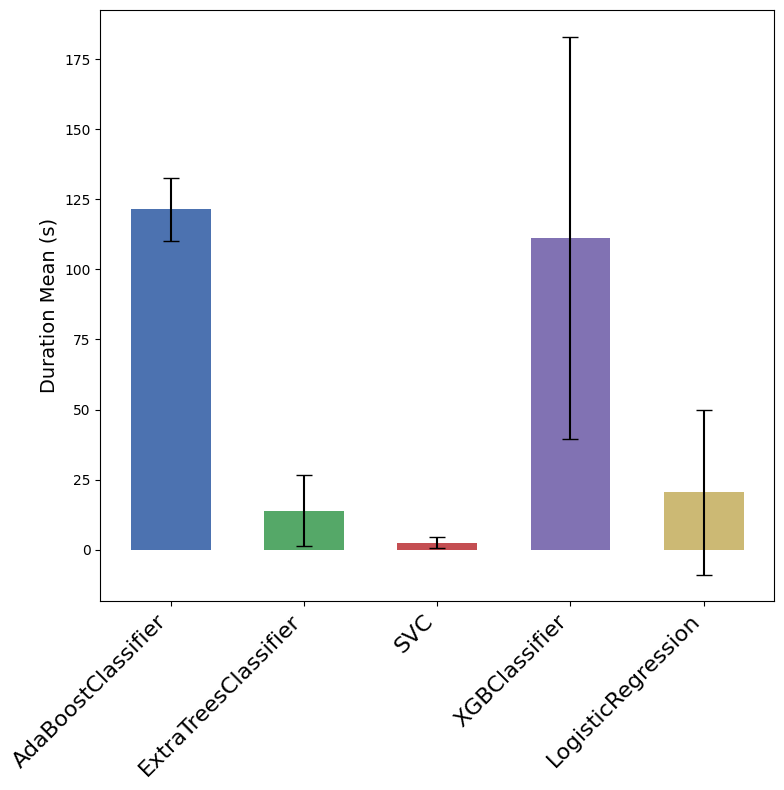

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the dataset
data = {
    "Filename": [
        "AdaBoostClassifier",
        "ExtraTreesClassifier",
        "SVC",
        "XGBClassifier",
        "LogisticRegression"
    ],
    "Duration Mean (s)": [121.52, 13.91, 2.52, 111.17, 20.40],
    "Duration Std (s)": [11.22, 12.74, 2.00, 71.81, 29.31]
}

# Define a color palette
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3", "#CCB974"]

df = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(8, 8))  # Taller and slimmer figure
bar_width = 0.6  # Narrower bars
plt.bar(df["Filename"], df["Duration Mean (s)"], yerr=df["Duration Std (s)"], capsize=6, width=bar_width, color=colors)
plt.ylabel('Duration Mean (s)', fontsize=14)
# plt.title('Duration Mean and Std Deviation for Each Model', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=16)

plt.tight_layout()
# plt.grid(axis='y')

# Show the plot
plt.show()
